In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam_ham_dataset.csv')

In [3]:
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.shape

(5171, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
df.rename(columns={'label':'target'},inplace=True)

In [7]:
df.head(5)


,Unnamed: 0,target,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
df.isnull().sum()

Unnamed: 0    0
target        0
text          0
label_num     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(5171, 4)

# 2EDA

In [11]:
df['target'].value_counts()

ham     3672
spam    1499
Name: target, dtype: int64

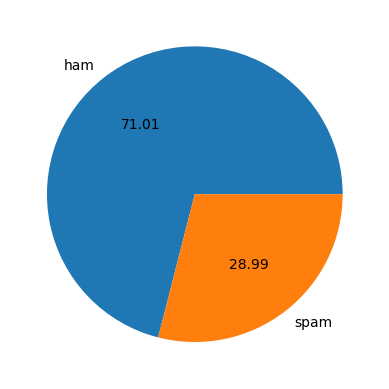

In [12]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [13]:
import nltk

In [22]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Kumari
[nltk_data]     Anupriya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df['num_character']=df['text'].apply(len)

In [15]:
df.head()

,Unnamed: 0,target,text,label_num,num_character
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [16]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
df.head()

,Unnamed: 0,target,text,label_num,num_character,num_word
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [18]:
df['num_sentance']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
df.head()

,Unnamed: 0,target,text,label_num,num_character,num_word,num_sentance
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [20]:
df[['num_character','num_word','num_sentance']].describe()

,num_character,num_word,num_sentance
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,229.181009,13.121253
std,1528.513435,336.487397,27.541637
min,11.000000,2.000000,1.000000
25%,244.000000,52.000000,4.000000
50%,540.000000,122.000000,7.000000
75%,1237.000000,283.500000,15.000000
max,32258.000000,8863.000000,1204.000000


In [21]:
df[df['label_num']==0][['num_character','num_word','num_sentance']].describe()

,num_character,num_word,num_sentance
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [22]:
df[df['label_num']==1][['num_character','num_word','num_sentance']].describe()

,num_character,num_word,num_sentance
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


In [23]:
import seaborn as sns

<AxesSubplot: xlabel='num_character', ylabel='Count'>

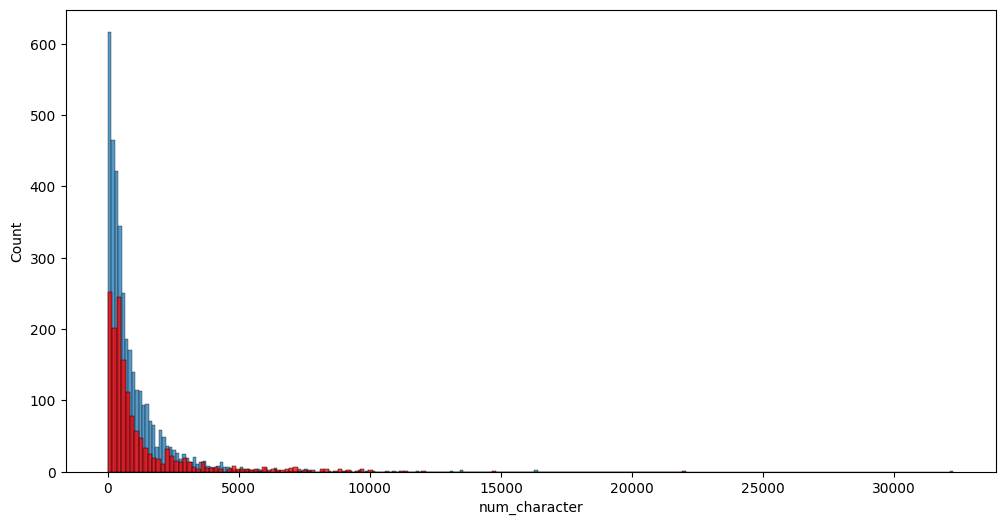

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label_num']==0]['num_character'])
sns.histplot(df[df['label_num']==1]['num_character'],color='red')

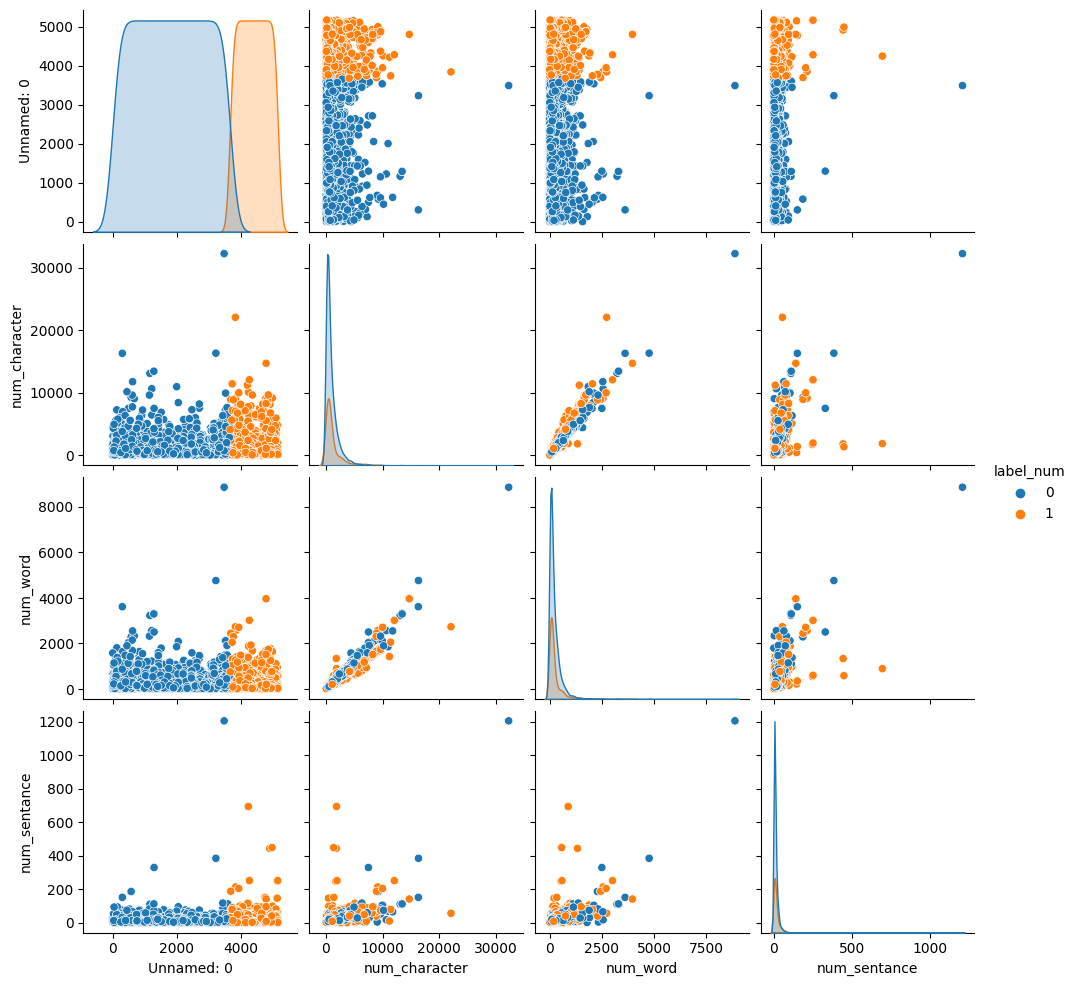

In [25]:
sns.pairplot(df,hue='label_num')

C:\Users\Kumari Anupriya\AppData\Local\Temp\ipykernel_19920\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

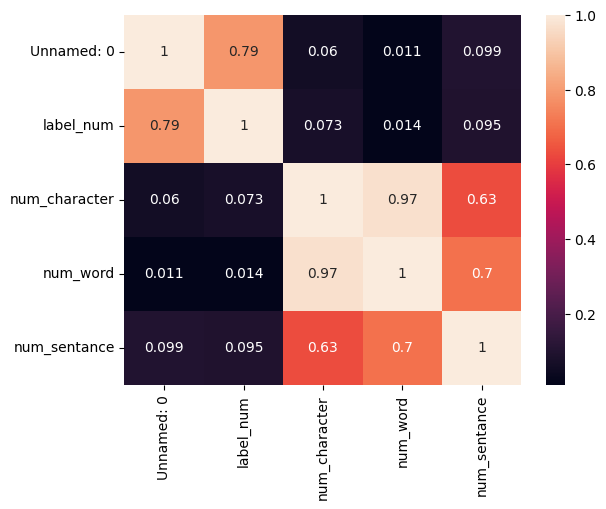

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
df.drop(['target'],inplace='True')

ValueError: For argument "inplace" expected type bool, received type str.

In [28]:
df.head()

,Unnamed: 0,target,text,label_num,num_character,num_word,num_sentance
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [29]:
df.drop('target', axis=1, inplace=True)

In [30]:
df.head()

,Unnamed: 0,text,label_num,num_character,num_word,num_sentance
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [31]:
df.rename(columns={'label_num':'target'},inplace=True)

In [32]:
from nltk.corpus import stopwords

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('danced')

'danc'

In [35]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)

In [36]:
transform_text('Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop  s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .')

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [37]:
df['transform_text']=df['text'].apply(transform_text)

In [38]:
df.head()

,Unnamed: 0,text,target,num_character,num_word,num_sentance,transform_text
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,4685,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,2030,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [39]:
import wordcloud
from wordcloud import WordCloud
wc= WordCloud(width=50,height=500,min_font_size=10,background_color='white')

In [40]:
spam_wc = wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

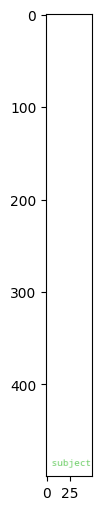

In [41]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [42]:
spam_corpus=[]
for msg in df[df['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
len(spam_corpus)


197452

In [44]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('subject', 1659),
 ('3', 1239),
 ('com', 992),
 ('http', 984),
 ('compani', 918),
 ('2', 858),
 ('price', 732),
 ('1', 720),
 ('0', 698),
 ('e', 638),
 ('www', 587),
 ('00', 585),
 ('inform', 557),
 ('get', 555),
 ('font', 515),
 ('email', 513),
 ('5', 510),
 ('pleas', 506),
 ('td', 504),
 ('secur', 499),
 ('statement', 497),
 ('4', 494),
 ('invest', 473),
 ('us', 469),
 ('stock', 467),
 ('product', 463),
 ('7', 457),
 ('time', 449),
 ('new', 432),
 ('may', 421)]

# model build

In [61]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [62]:
X=tfidf.fit_transform(df['transform_text']).toarray()

In [63]:
X.shape

(5171, 42592)

In [64]:
y=df['target'].values

In [65]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9516908212560387
[[717  29]
 [ 21 268]]
0.9023569023569024


In [71]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9227053140096618
[[746   0]
 [ 80 209]]
1.0


In [72]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.851207729468599
[[725  21]
 [133 156]]
0.8813559322033898


# tfid with mnb

In [73]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))